In [21]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

%matplotlib inline

In [22]:
# Config parameters
fs, s = wav.read("phonecall.wav")
frames = len(s)
tone_duration = fs * 0.04
N_fft = 256
tone_freqs = [697, 770, 852, 941, 1209, 1336, 1477] # 1633Hz for A, B, C, D column tones
print(f"Frame sample: {fs}, Number of frames: {frames}, Tone duration {tone_duration}")

Frame sample: 8000, Number of frames: 72000, Tone duration 320.0


In [41]:
def plot_time(signal):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.set_xlabel("Time [sec]")
    ax.set_ylabel("Magnitude")
    ax.plot(signal)
    
    
def plot_spectrum(freq, S):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("Magnitude")
    ax.plot(freq, S)
    

def plot_signal_and_spectrum(s, fs):
    plt.subplots(1, 2, figsize=(20, 6))

    plt.subplot(121)
    plt.plot(s)
    plt.xlabel("Time [sec]")
    plt.ylabel("Magnitude")
    plt.ylim([-1.5, 1.5])
    plt.grid()

    # spectrum of s (fs samples taken)
    # plot only the 1st half of spectrum (since it's symmetric)
    plt.subplot(122)

    amps = np.abs(np.fft.rfft(s, fs))
    freqs = np.fft.rfftfreq(fs, 1/fs)

    plt.xlabel("Freq [Hz]")
    plt.ylabel("Magnitude")
    plt.plot(freqs, amps)
    plt.grid()
    
    
def moving_average(data, window_width=3):
    '''
    Moving average filter
    '''    
    cumsum_vec = np.cumsum(data, dtype=float) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec

[(263, 0.79524478031004509),
 (464, 0.81948385555124104),
 (1991, 0.79307924370500915),
 (3273, 0.80063621971982446),
 (3381, 0.80663998327309672),
 (3382, 0.89817497535768698),
 (3726, 0.88787000806475713),
 (13046, 0.83041608172287107),
 (13049, 0.78196780071089345),
 (13128, 0.80551987813256076),
 (23035, 0.90901759311807417),
 (23071, 0.7824905164431436),
 (32150, 0.79838107470354547),
 (32547, 0.85293766241524538),
 (32548, 0.84302099823770138),
 (41977, 0.78434242360882944),
 (41996, 0.77739777173750713),
 (42089, 0.81203142268287587),
 (42155, 0.79875444308372423),
 (42225, 0.79726096956300962),
 (51381, 0.78918127781594438),
 (51700, 0.86763344185907587),
 (51874, 0.86530362316676135),
 (60876, 0.784402162549658),
 (60985, 0.82801158935452079),
 (60986, 0.79859016099644553),
 (61030, 0.93141969592879126),
 (61065, 0.78741897906150138),
 (61082, 0.85045849637085946),
 (61346, 0.84234893515337983),
 (61421, 0.92038292661071119),
 (70770, 1.0),
 (70771, 0.79272081006003769),
 (708

35

0.15471908780339155

0.12035017486168924

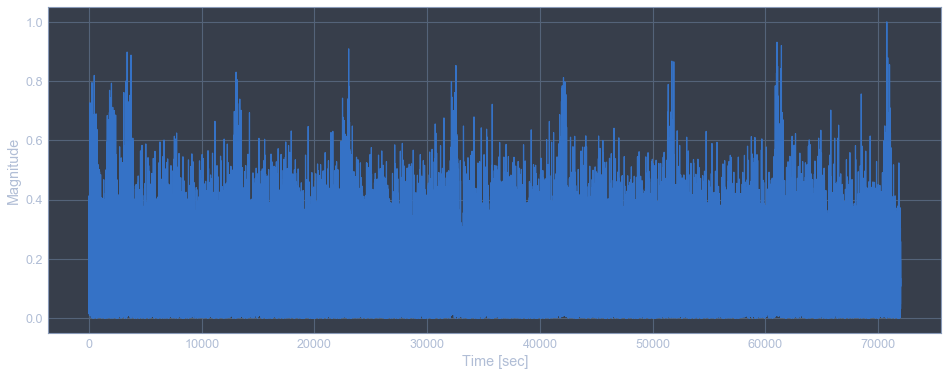

In [24]:
s_filtered = np.abs(moving_average(s, window_width=3))
s_filtered = s_filtered / np.max(np.abs(s_filtered))

plot_time(s_filtered)

avg = np.average(s_filtered)
std = np.std(s_filtered)

tone_candidates = [(sample, sg) for (sample, sg) in enumerate(s_filtered) if sg > avg * 5] # Threshold of 85%
display(tone_candidates, len(tone_candidates), avg, std)


129 129 320


array([[  781.25],
       [ 1187.5 ],
       [ 1218.75]])

0.1328703020407922

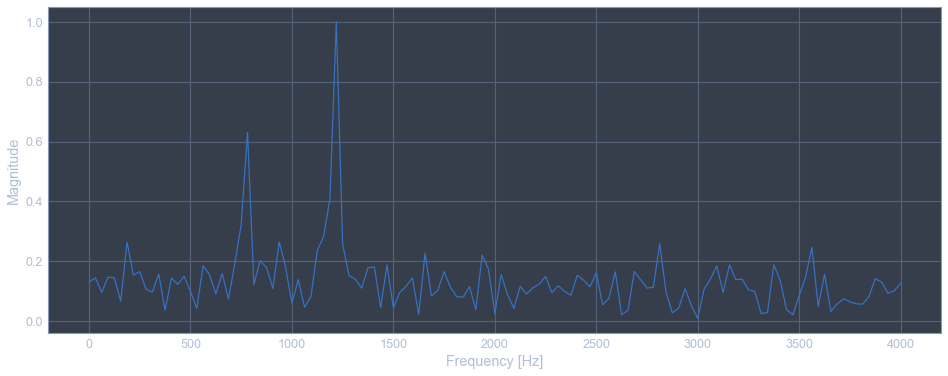

In [44]:
tone_candidate = tone_candidates[10]
tone_duration = fs * 0.04
start = int(tone_candidate[0] - tone_duration / 2)
stop = int(tone_candidate[0] + tone_duration / 2)

smpl_fft = np.abs(np.fft.rfft(s[start:stop], N_fft))
# smpl_fft = 20*np.log10(np.abs(smpl_fft) / np.abs(smpl_fft).max()) # Convert to dB scale
smpl_fft = np.abs(smpl_fft) / np.abs(smpl_fft).max()

smpl_freq = np.fft.rfftfreq(N_fft, 1/fs)

print(len(smpl_freq), len(smpl_fft), len(s_norm[start:stop]))

# Normalized magnitude
plot_spectrum(smpl_freq, smpl_fft)
amp_avg = np.average(smpl_fft)
display(smpl_freq[np.argwhere(smpl_fft > amp_avg * 3)], amp_avg) # -5dB threshold
